In [1]:
import pandas as pd
import numpy as np
import os
import category_encoders as ce
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

print('Imported all necesary libraries for feature selection!')

Imported all necesary libraries for feature selection!


In [2]:
irl = pd.read_csv('initial-ml-test-dub-1.csv', index_col='Unnamed: 0')

In [3]:
irl.head()

,Address,County,Price (€),VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,...,Longitude,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar
207901,"55 College Square, Terenure",Dublin,447200.00,0,0,1,2014,1,Terenure,0,...,-6.335665,7.541595,0.492120,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.427900
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,0,2014,1,Dundrum Dublin,0,...,-6.238896,6.817210,0.100996,2.784711,0.274841,0.831639,7.118560,3.635958,14.874822,5.905557
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,0,0,1,2014,1,Templeogue,1,...,-6.312400,7.799393,0.683556,3.098765,3.760897,0.968202,7.197697,3.879724,17.923987,6.179356
207925,"75 Palmerstown Avenue, Palmerstown",Dublin,95000.00,1,1,1,2014,1,Palmerstown,0,...,-6.372213,8.400802,0.319564,1.909348,3.576775,0.262801,7.051363,3.811554,18.189754,6.208934
207929,"17 Churchview Apts, Church Rd, Drumcondra",Dublin,152000.00,1,1,2,2014,1,Drumcondra,1,...,-6.263792,2.225835,0.085034,0.909828,1.942439,0.597393,1.805008,0.902578,10.897507,1.587952


In [4]:
irl.drop(columns=['Price (€)', 'County'], inplace = True)

In [5]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
irl['Town'] = encoder.fit_transform(irl['Town'], irl['PriceInflation'])

In [6]:
#encoder = TargetEncoder()
#irl['Region'] = encoder.fit_transform(irl['Region'], irl['PriceInflation'])

In [7]:
#encoder = TargetEncoder()
#irl['County'] = encoder.fit_transform(irl['County'], irl['PriceInflation'])

In [8]:
encoder = TargetEncoder()
irl['Neighbourhood'] = encoder.fit_transform(irl['Neighbourhood'], irl['PriceInflation'])

In [9]:
encoder = TargetEncoder()
irl['Eircode'] = encoder.fit_transform(irl['Eircode'], irl['PriceInflation'])

In [10]:
#encoder = TargetEncoder()
#irl['Province'] = encoder.fit_transform(irl['Province'], irl['PriceInflation'])

In [11]:
irl.head()

,Address,VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,PriceInflation,...,Longitude,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar
207901,"55 College Square, Terenure",0,0,1,2014,1,601864.418417,0,8.997207e+05,846407.80,...,-6.335665,7.541595,0.492120,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.427900
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",1,1,0,2014,1,651335.338306,0,1.661424e+06,753287.80,...,-6.238896,6.817210,0.100996,2.784711,0.274841,0.831639,7.118560,3.635958,14.874822,5.905557
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",0,0,1,2014,1,741771.837018,1,5.978632e+05,371032.55,...,-6.312400,7.799393,0.683556,3.098765,3.760897,0.968202,7.197697,3.879724,17.923987,6.179356
207925,"75 Palmerstown Avenue, Palmerstown",1,1,1,2014,1,414681.974545,0,3.345868e+05,179804.88,...,-6.372213,8.400802,0.319564,1.909348,3.576775,0.262801,7.051363,3.811554,18.189754,6.208934
207929,"17 Churchview Apts, Church Rd, Drumcondra",1,1,2,2014,1,570683.081926,1,3.053076e+05,287687.80,...,-6.263792,2.225835,0.085034,0.909828,1.942439,0.597393,1.805008,0.902578,10.897507,1.587952


In [12]:
#cleanup_nums_new = {"Estate": {"Other": 0, "Estate": 1}}
#irl = irl.replace(cleanup_nums_new)
#irl.head()

In [13]:
irl.drop(columns=['Address'], inplace=True)

In [14]:
irl.columns

Index(['VAT Exclusive', 'UsedProperty', 'Property Size Description', 'Year',
       'Month', 'Town', 'Apartment', 'Neighbourhood', 'PriceInflation',
       'Eircode', 'Latitude', 'Longitude', 'DistanceIFSC', 'DistanceSchool',
       'DistancePark', 'DistanceLuas', 'DistanceSecSchool', 'DistanceGPO',
       'DistanceHospital', 'DistanceBeach', 'DistanceCar'],
      dtype='object')

In [15]:
irl['LogPrice (€)'] = np.log(irl['PriceInflation'])
#irl.drop(columns=['Price (€)'], inplace = True)
irl

,VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,PriceInflation,Eircode,...,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar,LogPrice (€)
207901,0,0,1,2014,1,6.018644e+05,0,8.997207e+05,846407.80,628715.337138,...,7.541595,0.492120,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.427900,13.648757
207905,1,1,0,2014,1,6.513353e+05,0,1.661424e+06,753287.80,651335.338306,...,6.817210,0.100996,2.784711,0.274841,0.831639,7.118560,3.635958,14.874822,5.905557,13.532203
207916,0,0,1,2014,1,7.417718e+05,1,5.978632e+05,371032.55,628715.337138,...,7.799393,0.683556,3.098765,3.760897,0.968202,7.197697,3.879724,17.923987,6.179356,12.824045
207925,1,1,1,2014,1,4.146820e+05,0,3.345868e+05,179804.88,406163.221538,...,8.400802,0.319564,1.909348,3.576775,0.262801,7.051363,3.811554,18.189754,6.208934,12.099628
207929,1,1,2,2014,1,5.706831e+05,1,3.053076e+05,287687.80,411979.725512,...,2.225835,0.085034,0.909828,1.942439,0.597393,1.805008,0.902578,10.897507,1.587952,12.569631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261963,1,1,2,2021,10,4.404562e+05,0,5.342362e+05,415050.00,440456.154028,...,17.439163,0.099830,9.753778,17.117054,1.238197,17.969543,12.672494,2.439385,17.493432,12.936154
261968,0,0,2,2021,11,5.859559e+05,0,5.990728e+05,524229.00,794885.173096,...,12.378025,0.892319,1.511927,0.722227,1.557293,13.209351,1.660108,15.959151,11.962211,13.169684
262028,1,1,2,2021,12,2.596375e+05,0,2.461443e+05,280000.00,259637.487366,...,9.121749,1.230371,2.045147,0.237933,1.054941,7.930295,3.074173,19.652561,6.780013,12.542545
262032,1,1,2,2021,10,1.137529e+06,0,1.235166e+06,1230000.00,794885.173096,...,11.182747,0.468291,2.346736,4.270358,0.672380,12.275115,1.737667,12.687670,11.129865,14.022525


### Information Gain

In [16]:
x = irl.loc[:, irl.columns != 'LogPrice (€)']
y = irl['LogPrice (€)']

In [17]:
x.shape

(5386, 21)

In [18]:
x

,VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,PriceInflation,Eircode,...,Longitude,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar
207901,0,0,1,2014,1,6.018644e+05,0,8.997207e+05,846407.80,628715.337138,...,-6.335665,7.541595,0.492120,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.427900
207905,1,1,0,2014,1,6.513353e+05,0,1.661424e+06,753287.80,651335.338306,...,-6.238896,6.817210,0.100996,2.784711,0.274841,0.831639,7.118560,3.635958,14.874822,5.905557
207916,0,0,1,2014,1,7.417718e+05,1,5.978632e+05,371032.55,628715.337138,...,-6.312400,7.799393,0.683556,3.098765,3.760897,0.968202,7.197697,3.879724,17.923987,6.179356
207925,1,1,1,2014,1,4.146820e+05,0,3.345868e+05,179804.88,406163.221538,...,-6.372213,8.400802,0.319564,1.909348,3.576775,0.262801,7.051363,3.811554,18.189754,6.208934
207929,1,1,2,2014,1,5.706831e+05,1,3.053076e+05,287687.80,411979.725512,...,-6.263792,2.225835,0.085034,0.909828,1.942439,0.597393,1.805008,0.902578,10.897507,1.587952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261963,1,1,2,2021,10,4.404562e+05,0,5.342362e+05,415050.00,440456.154028,...,-6.135906,17.439163,0.099830,9.753778,17.117054,1.238197,17.969543,12.672494,2.439385,17.493432
261968,0,0,2,2021,11,5.859559e+05,0,5.990728e+05,524229.00,794885.173096,...,-6.147053,12.378025,0.892319,1.511927,0.722227,1.557293,13.209351,1.660108,15.959151,11.962211
262028,1,1,2,2021,12,2.596375e+05,0,2.461443e+05,280000.00,259637.487366,...,-6.372816,9.121749,1.230371,2.045147,0.237933,1.054941,7.930295,3.074173,19.652561,6.780013
262032,1,1,2,2021,10,1.137529e+06,0,1.235166e+06,1230000.00,794885.173096,...,-6.119818,11.182747,0.468291,2.346736,4.270358,0.672380,12.275115,1.737667,12.687670,11.129865


In [19]:
y.shape

(5386,)

Feature: 0, Score: -0.14889
Feature: 1, Score: 0.05889
Feature: 2, Score: -0.00910
Feature: 3, Score: 0.01644
Feature: 4, Score: 0.00168
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.03878
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: -1.84407
Feature: 11, Score: -1.24272
Feature: 12, Score: -0.00838
Feature: 13, Score: 0.00854
Feature: 14, Score: 0.03794
Feature: 15, Score: 0.00184
Feature: 16, Score: -0.00263
Feature: 17, Score: 0.04538
Feature: 18, Score: 0.01227
Feature: 19, Score: -0.02952
Feature: 20, Score: -0.05728


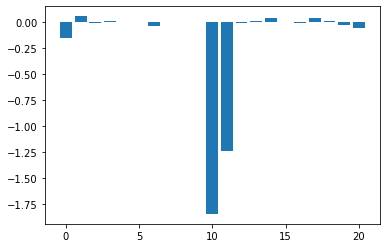

In [20]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

model = LinearRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.99994
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000


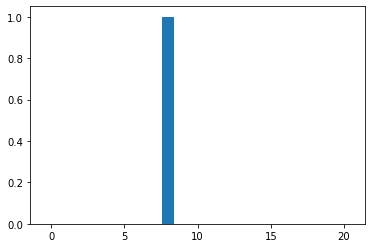

In [21]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00004
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00068
Feature: 3, Score: 0.00015
Feature: 4, Score: 0.00014
Feature: 5, Score: 0.00019
Feature: 6, Score: 0.00043
Feature: 7, Score: 0.00027
Feature: 8, Score: 0.99461
Feature: 9, Score: 0.00014
Feature: 10, Score: 0.00013
Feature: 11, Score: 0.00033
Feature: 12, Score: 0.00011
Feature: 13, Score: 0.00034
Feature: 14, Score: 0.00055
Feature: 15, Score: 0.00007
Feature: 16, Score: 0.00046
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00100
Feature: 19, Score: 0.00022
Feature: 20, Score: 0.00007


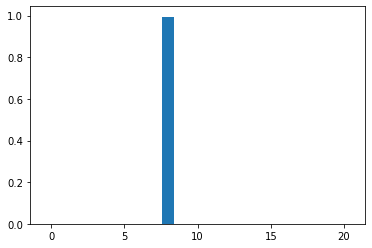

In [22]:
from xgboost import XGBRegressor
model = XGBRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<AxesSubplot:>

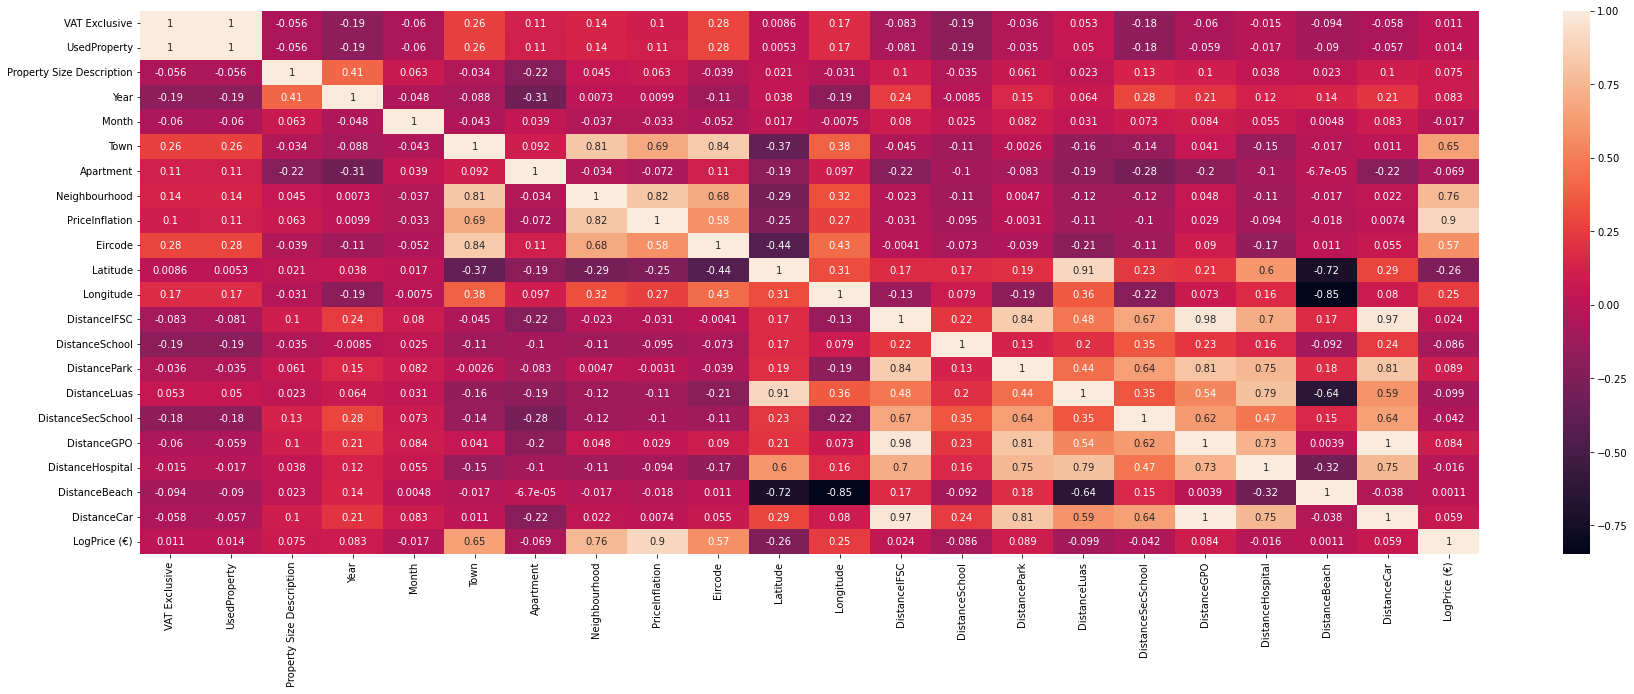

In [23]:
corr = irl.corr()

plt.figure(figsize = (30,10))
sns.heatmap(corr, annot = True)

In [24]:
irl.head()

,VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,PriceInflation,Eircode,...,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar,LogPrice (€)
207901,0,0,1,2014,1,601864.418417,0,8.997207e+05,846407.80,628715.337138,...,7.541595,0.492120,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.427900,13.648757
207905,1,1,0,2014,1,651335.338306,0,1.661424e+06,753287.80,651335.338306,...,6.817210,0.100996,2.784711,0.274841,0.831639,7.118560,3.635958,14.874822,5.905557,13.532203
207916,0,0,1,2014,1,741771.837018,1,5.978632e+05,371032.55,628715.337138,...,7.799393,0.683556,3.098765,3.760897,0.968202,7.197697,3.879724,17.923987,6.179356,12.824045
207925,1,1,1,2014,1,414681.974545,0,3.345868e+05,179804.88,406163.221538,...,8.400802,0.319564,1.909348,3.576775,0.262801,7.051363,3.811554,18.189754,6.208934,12.099628
207929,1,1,2,2014,1,570683.081926,1,3.053076e+05,287687.80,411979.725512,...,2.225835,0.085034,0.909828,1.942439,0.597393,1.805008,0.902578,10.897507,1.587952,12.569631


In [31]:
irl1 = irl[['Year', 'Town', 'Neighbourhood', 'Eircode', 'Latitude', 'Longitude', 'DistanceLuas', 'PriceInflation']]

In [32]:
#irl1.to_csv('features-selected-dublin.csv')

In [25]:
#irl.to_csv('features-selected-dub-all.csv')